In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/2023년_카이스트_금융시계열/1주차실습/1. 금융시계열 실습')

In [3]:
# ARMA 모형을 임의로 생성하고, ARMA 파라메터가 변할 때 시계열의 모습이 어떻게
# 변하는지 육안으로 확인한다. ARMA 파라메터의 특성을 직관적으로 이해한다.
# 또한, ARMA 모형에 대한 ACF와 PACF 특성을 육안으로 확인한다.
# ACF/PACF는 향후 실제 시계열을 분석할 때 분석 모델을 선정에 참고한다.

In [7]:
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------------
import matplotlib.pyplot as plt
from MyUtil.MyTimeSeries import sampleARIMA
from statsmodels.tsa.arima.model import ARIMA

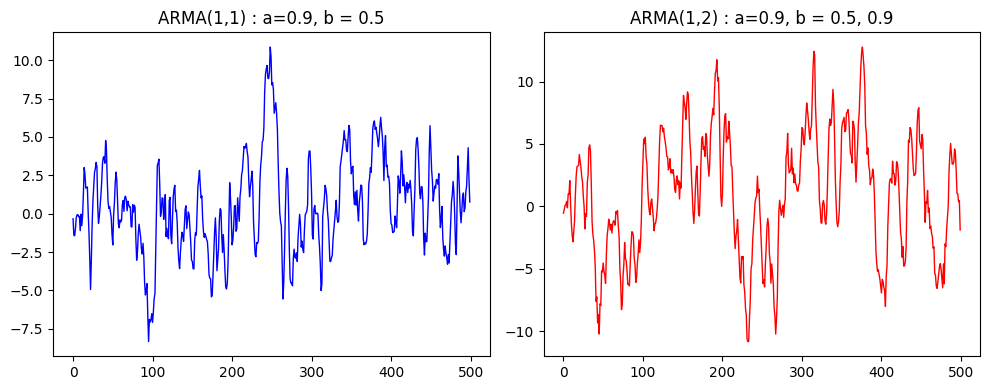

In [8]:
# MA 모형의 parameter 변화에 따른 그래프 모양을 확인한다.
# a 값을 변화시켜 가면서 그래프의 모양이 어떻게 바뀌는지 확인한다.
y1 = sampleARIMA(ar=[0.9], d=0, ma=[0.5], n=500)
y2 = sampleARIMA(ar=[0.9], d=0, ma=[0.5, 0.9], n=500)

fig = plt.figure(figsize=(10, 4))
p1 = fig.add_subplot(1,2,1)
p2 = fig.add_subplot(1,2,2)

p1.plot(y1, color='blue', linewidth=1)
p2.plot(y2, color='red', linewidth=1)
p1.set_title("ARMA(1,1) : a=0.9, b = 0.5")
p2.set_title("ARMA(1,2) : a=0.9, b = 0.5, 0.9")
plt.tight_layout()
plt.show()

In [9]:
# 임의로 생성한 ARMA(1,1) 샘플 데이터를 분석하여 b 값을 추정해 본다.
# 생성할 때 지정한 값으로 추정이 잘되는지 확인한다.
y = sampleARIMA(ar=[0.9], d=0, ma=[0.5], n=500)
model = ARIMA(y, order=(1,0,1)).fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -709.841
Date:                Tue, 24 Oct 2023   AIC                           1427.681
Time:                        04:13:39   BIC                           1444.540
Sample:                             0   HQIC                          1434.297
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1976      0.738      0.268      0.789      -1.250       1.645
ar.L1          0.9062      0.019     46.651      0.000       0.868       0.944
ma.L1          0.5333      0.040     13.407      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -1405.778
Date:                Tue, 24 Oct 2023   AIC                           2821.555
Time:                        04:13:40   BIC                           2846.094
Sample:                             0   HQIC                          2830.882
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0735      0.080      0.919      0.358      -0.083       0.230
ar.L1          0.4537      0.101      4.505      0.000       0.256       0.651
ma.L1          0.4666      0.109      4.291      0.0

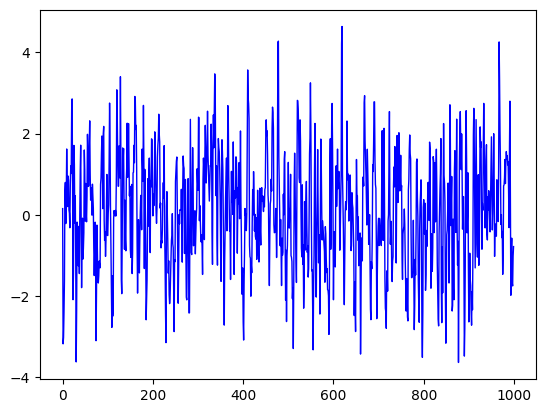

In [10]:
# ARMA(1,2) 모형도 확인해 본다
y = sampleARIMA(ar=[0.5], d=0, ma=[0.5, -0.1], n=1000)
plt.plot(y, color='blue', linewidth=1)
model = ARIMA(y, order=(1,0,2)).fit()
print(model.summary())

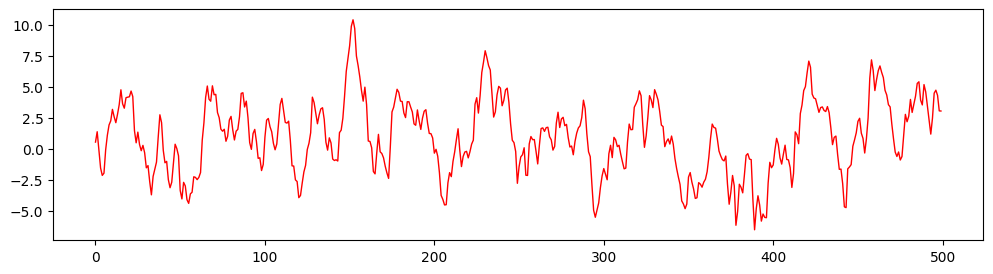

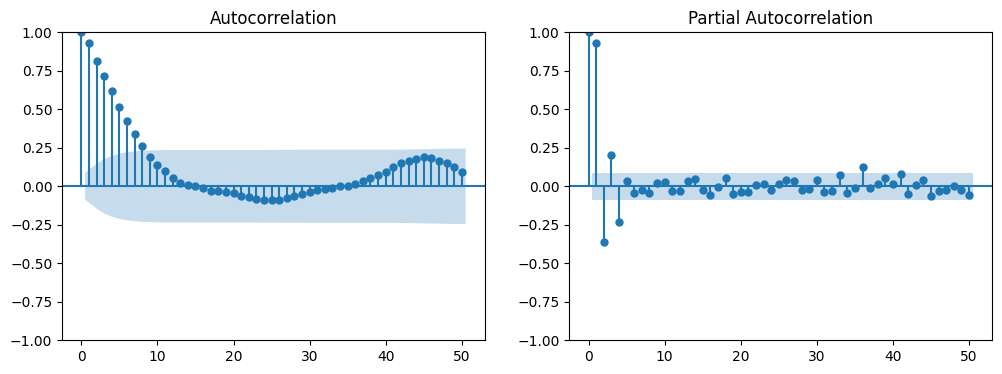

In [11]:
# ARMA 모형의 ACF와 PACF를 확인해 본다. a,b 값을 변화시켜 가면서 비교해 본다
# ACF와 PACF는 향후 실제 시계열을 어느 모형으로 분석할 지에 대한 단서를 제공한다
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
y = sampleARIMA(ar=[0.9], d=0, ma=[0.5, -0.1], n=500)
fig = plt.figure(figsize=(12, 3))
plt.plot(y, color='red', linewidth=1)
plt.show()
fig = plt.figure(figsize=(12, 4))
p1 = fig.add_subplot(1,2,1)
p2 = fig.add_subplot(1,2,2)
plot_acf(y, p1, lags=50)
plot_pacf(y, p2, lags=50)
plt.show()


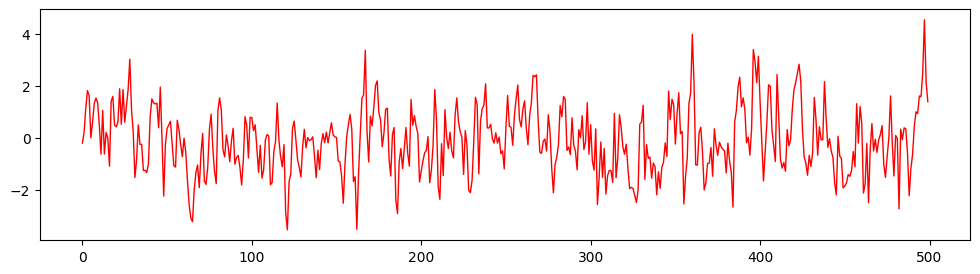

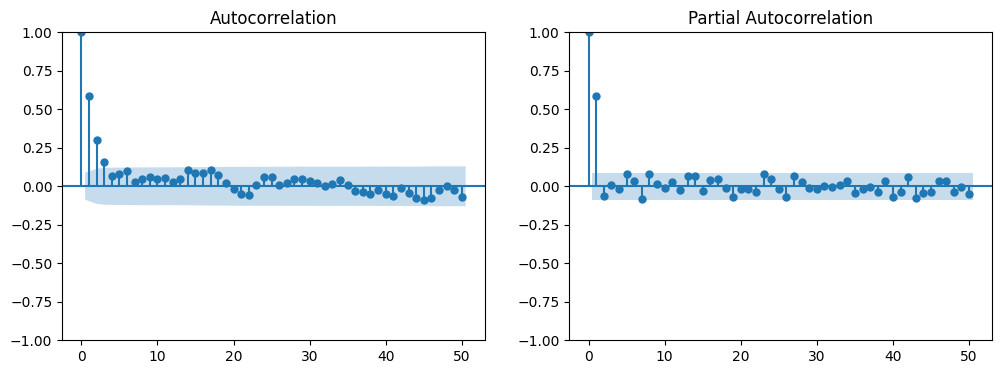

In [12]:
# ARMA 모형의 ACF와 PACF를 확인해 본다. a,b 값을 변화시켜 가면서 비교해 본다
# ACF와 PACF는 향후 실제 시계열을 어느 모형으로 분석할 지에 대한 단서를 제공한다
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
y = sampleARIMA(ar=[0.5], d=0, ma=[0.1], n=500)
fig = plt.figure(figsize=(12, 3))
plt.plot(y, color='red', linewidth=1)
plt.show()
fig = plt.figure(figsize=(12, 4))
p1 = fig.add_subplot(1,2,1)
p2 = fig.add_subplot(1,2,2)
plot_acf(y, p1, lags=50)
plot_pacf(y, p2, lags=50)
plt.show()